# Análisis de componentes principales para el estudio del delito en Chile. Medium.

## Histogramas

Introducidos por Karl Pearson, un histograma es la representación precisa de la distribución de datos numéricos, que es una estimación de la distribución de probabilidad de una variable continua (CORAL). Parece similar al gráfico de barras, pero un gráfico de barras relaciona dos variables, mientras que un histograma relaciona solo una.

Un histograma requiere de un contenedor que divida el rango completo de valores en una serie de intervalos, y luego cuenta cuántos valores caen en cada uno. Los contenedores generalmente se especifican como intervalos consecutivos, no superpuestos de una variable. Los contenedores deben ser adyacentes y, a menudo, son del mismo tamaño. Se levanta un rectángulo sobre el contenedor con una altura proporcional a la frecuencia: el número de casos en cada contenedor.

La función go.Histogram( ) devuelve el objeto de rastreo de histograma. Su personalización se realiza mediante varios argumentos o atributos. Un argumento esencial es x o y establecido en una lista, un numpy array o un objeto DataFrame Pandas que se distribuirá en contenedores.

Por defecto, Plotly distribuye los puntos de datos en contenedores de tamaño automático. Sin embargo, puedes definir un tamaño de contenedor personalizado. Para ello necesitas establecer autobins en falso, especificar4 nbins (número de bins), sus valores y tamaño de inicio y fin.

In [761]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

In [762]:
df = pd.read_csv("C:/Users/usuario/Documents/GitHub_Personal/Bases_de_Datos_DS/dmcs1.csv" , delimiter=";",encoding='latin1',decimal=",")

In [763]:
df.head(5)

,REGION,UNIDAD TERRITORIAL,Rob_vio_o_int,Rob_sor,Rob_fuerza,Rob_vehi,Rob_acc_vehi,Robo_lug_habi,Robo_lug_no_habi,Otros_rob_fuerza,Hurtos,Lesiones,Lesiones_leves,Lesiones_graves,Homicidio,Violacion
0,3,Alto del Carmen,0.0,0.0,231.238175,0.0,0.000000,84.086609,147.151566,0.00000,147.151566,105.108261,63.064957,42.043305,0.0,0.000000
1,12,Ant rtica,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,12,Cabo de Hornos,0.0,0.0,132.013201,0.0,0.000000,0.000000,132.013201,0.00000,99.009901,99.009901,66.006601,33.003300,0.0,0.000000
3,15,Camarones,0.0,0.0,420.388860,0.0,52.548607,210.194430,157.645822,0.00000,367.840252,262.743037,262.743037,0.000000,0.0,52.548607
4,1,Cami¤a,0.0,0.0,353.356890,0.0,0.000000,117.785630,117.785630,117.78563,117.785630,824.499411,706.713781,117.785630,0.0,0.000000


Robo con violencia o intimidación:  Consiste en la apropiación de una cosa mueble ajena, efectuada sin la voluntad de su dueño y con ánimo de lucro, ejerciendo el autor fuerza física o moral sobre una persona.

Robo por sorpresa: Se trata de una figura intermedia entre el hurto y el robo, porque en su comisión no se emplea la violencia propia del delito de robo con violencia o intimidación, pero tampoco se actúa en la clandestinidad normalmente inherente al hurto. Es lo que se conoce como el “lanzazo”. Ocurre cuando los autores actúan por sorpresa, aparentando riñas o montando maniobras para causar confusión en lugares públicos.

In [764]:
df['Rob_vio_o_int']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
          ...     
341    1257.437970
342    1335.613356
343    1453.901251
344    1641.376497
345    2790.062525
Name: Rob_vio_o_int, Length: 346, dtype: float64

In [804]:

trace1 = go.Histogram(
    x = df['Rob_vio_o_int'],   
    # histnorm = 'percent')
    histnorm = 'probability',
    opacity = 0.55,
    name = 'Robos con violencia o intimidacion',
    nbinsx=60)              
                      
trace2 = go.Histogram(
    x = df['Rob_sor'],   
    # histnorm = 'percent')
    histnorm = 'probability',
    opacity = 0.55,
    name = 'Robos por sorpresa',
    nbinsx=60,

    yaxis = 'y2')

data = [trace1, trace2]

layout = go.Layout(
    title='Distribución de la probabilidad de los delitos por comuna',
    barmode='overlay',
    xaxis=dict(
    title='tasa'
    ),
    yaxis=dict(
        title='Probabilidad de robos con violencia o intimidación'
    ),
    yaxis2=dict(
        title='Probabilidad de robos por sorpresa',
        anchor='free',
        overlaying='y',
        side='right',
        position=1
    ),
    height=400, width=700
) 

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b68a32e4c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2b68a346f08>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2b68a32e908>,
 'medians': [<matplotlib.lines.Line2D at 0x2b68a32e348>,
 'fliers': [],
 'means': []}

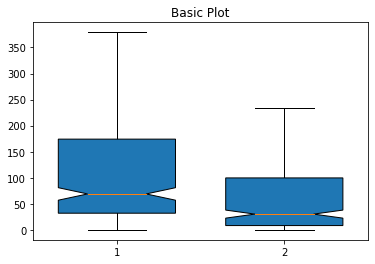

In [790]:
import numpy as np
import matplotlib.pyplot as plt

data = XX_pca

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([data["Rob_vio_o_int"],data["Rob_sor"]],  notch=True, showfliers=False, widths = 0.7, patch_artist = True)



### Estandarización

In [767]:
from sklearn.preprocessing import StandardScaler

In [768]:
Rob_vio_o_int = df['Rob_vio_o_int'].values.reshape(-1, 1)
X_std = StandardScaler().fit_transform(Rob_vio_o_int)

Rob_sor = df['Rob_sor'].values.reshape(-1, 1)
Y_std = StandardScaler().fit_transform(Rob_sor)


### 3 Valores y vectores propios de la matriz de covarianzas

In [769]:
from IPython.display import display, Math, Latex

In [770]:
display(Math(r'\sigma_{jk}'))

<IPython.core.display.Math object>

In [771]:
mean_vect = np.mean(X_std, axis = 0)
mean_vect

array([4.10718344e-17])

In [772]:
XX = df.iloc[:,2:16].values
XXX_std = StandardScaler().fit_transform(XX)
# XXX_std

In [773]:
cov_matrix = (XXX_std - mean_vect).T.dot((XXX_std - mean_vect))/(XXX_std.shape[0]-1)
# cov_matrix

In [774]:
# np.cov(XXX_std.T)

In [775]:
# Descomposicion de la matriz de covarianzas:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
# print("Valores propios \n%s"%eig_vals)
# print("Vectores propios \n%s"%eig_vectors)

### 4 Valores y vectores propios utilizando la matriz de correlaciones

In [797]:
corr_matrix = np.corrcoef(XXX_std.T)
corr_matrix

array([[1.        , 0.88470184, 0.66980849, 0.89310135, 0.74666779,
        0.16031503, 0.36351788, 0.36070281, 0.54372945, 0.42809897,
        0.41968994, 0.25546752, 0.23933723, 0.15041924],
       [0.88470184, 1.        , 0.65058729, 0.83202237, 0.71192201,
        0.1580298 , 0.38599828, 0.41221024, 0.70013756, 0.43900167,
        0.42883671, 0.26701091, 0.20101739, 0.18564921],
       [0.66980849, 0.65058729, 1.        , 0.71983799, 0.84326629,
        0.68781296, 0.71181462, 0.56224658, 0.64674715, 0.50905585,
        0.52534281, 0.21789761, 0.11688712, 0.10081957],
       [0.89310135, 0.83202237, 0.71983799, 1.        , 0.78352167,
        0.17777935, 0.38498143, 0.38451664, 0.57800168, 0.40345989,
        0.4011524 , 0.22241079, 0.19417689, 0.14881543],
       [0.74666779, 0.71192201, 0.84326629, 0.78352167, 1.        ,
        0.27389616, 0.46761144, 0.52267203, 0.64064372, 0.34281146,
        0.36449859, 0.11171718, 0.09352538, 0.06627658],
       [0.16031503, 0.1580298 , 0.6

In [798]:
# Descomposicion de la matriz de correlaciones:
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[ 6.48949276e+00  1.77923546e+00  1.37012560e+00  1.00779391e+00
  8.98447908e-01  6.86083557e-01  6.76277515e-02  1.22346905e-01
  2.58758182e-01  5.22650551e-01  3.68996718e-01  4.28440693e-01
  2.08458683e-16 -6.30454632e-16]
Vectores propios 
[[-3.18622336e-01 -2.59336213e-01 -2.77725967e-01  8.16704665e-02
   2.28640630e-02  1.85905955e-01  7.29023829e-01  2.33062070e-01
  -2.31503165e-01  8.52680034e-02  2.41171346e-01  8.67025425e-02
   1.39292374e-11 -6.07249754e-12]
 [-3.24461448e-01 -2.29705811e-01 -2.60076578e-01 -1.78143649e-02
   7.02205790e-02  9.74887818e-02 -5.70337157e-01  3.71062305e-01
  -5.18973994e-01 -3.43060836e-02 -1.49958763e-01 -5.99798899e-02
   1.07724113e-10 -1.36408579e-11]
 [-3.49934619e-01 -1.26687407e-01  3.14716842e-01  1.07202922e-01
  -9.05233620e-02  9.34454389e-02 -6.84904727e-02  7.14317117e-03
   1.83453334e-01 -8.74531257e-02  4.44998625e-02  7.44735983e-02
  -7.87134170e-02 -8.22072746e-01]
 [-3.20971011e-01 -2.83936092e-01 -2.

#### La matriz de correlaciones es la que se obtiene de la de covarianzas una vez que los datos estan estandarizadas

### 4c) Descomposiciones del valor singular

In [799]:
u, s, v = np.linalg.svd(XXX_std.T)

In [802]:
v

array([[ 0.05673258,  0.07687065,  0.06083183, ..., -0.16360287,
        -0.125539  , -0.569789  ],
       [-0.04311598, -0.0785809 , -0.04738593, ..., -0.16268953,
        -0.11066476, -0.14613116],
       [ 0.00493171,  0.02072771,  0.01379059, ...,  0.00631558,
         0.12676507,  0.17207213],
       ...,
       [ 0.2571822 ,  0.26540099,  0.06049093, ...,  0.82866637,
        -0.12721758,  0.02771087],
       [ 0.28729346,  0.25036069, -0.12176248, ..., -0.12280757,
         0.80921141, -0.01121666],
       [ 0.51498851, -0.47910798,  0.01732494, ...,  0.02792805,
        -0.0128568 ,  0.33883664]])

### Selección de los componentes principales

In [776]:
df = pd.read_csv("C:/Users/usuario/Documents/GitHub_Personal/Bases_de_Datos_DS/dmcs1.csv" , delimiter=";",encoding='latin1',decimal=",")
XX_pca = df.iloc[:,0:6]
XX_pca.head()

,REGION,UNIDAD TERRITORIAL,Rob_vio_o_int,Rob_sor,Rob_fuerza,Rob_vehi
0,3,Alto del Carmen,0.0,0.0,231.238175,0.0
1,12,Ant rtica,0.0,0.0,0.000000,0.0
2,12,Cabo de Hornos,0.0,0.0,132.013201,0.0
3,15,Camarones,0.0,0.0,420.388860,0.0
4,1,Cami¤a,0.0,0.0,353.356890,0.0


In [777]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

n_components = 4

# Realizamos el PCA.
pca = PCA(n_components = n_components)
reduced = pca.fit_transform(XX_pca[['Rob_vio_o_int', 'Rob_sor',
                                'Rob_fuerza', 'Rob_vehi']])

# Anadimos el componente principal para cada observacion del dataframe
for i in range(0, n_components):
    XX_pca['PC' + str(i + 1)] = reduced[:, i]

display(XX_pca.head())

,REGION,UNIDAD TERRITORIAL,Rob_vio_o_int,Rob_sor,Rob_fuerza,Rob_vehi,PC1,PC2,PC3,PC4
0,3,Alto del Carmen,0.0,0.0,231.238175,0.0,-654.114805,30.132588,14.022021,6.110601
1,12,Ant rtica,0.0,0.0,0.000000,0.0,-871.049725,109.851071,14.599266,13.524405
2,12,Cabo de Hornos,0.0,0.0,132.013201,0.0,-747.202210,64.340021,14.269718,9.291886
3,15,Camarones,0.0,0.0,420.388860,0.0,-476.664051,-35.076392,13.549840,0.046177
4,1,Cami¤a,0.0,0.0,353.356890,0.0,-539.549752,-11.967375,13.717173,2.195312


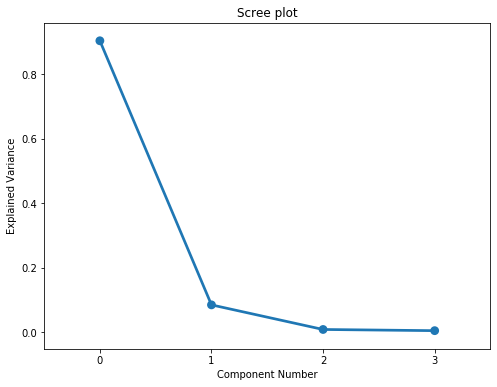

In [778]:
# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

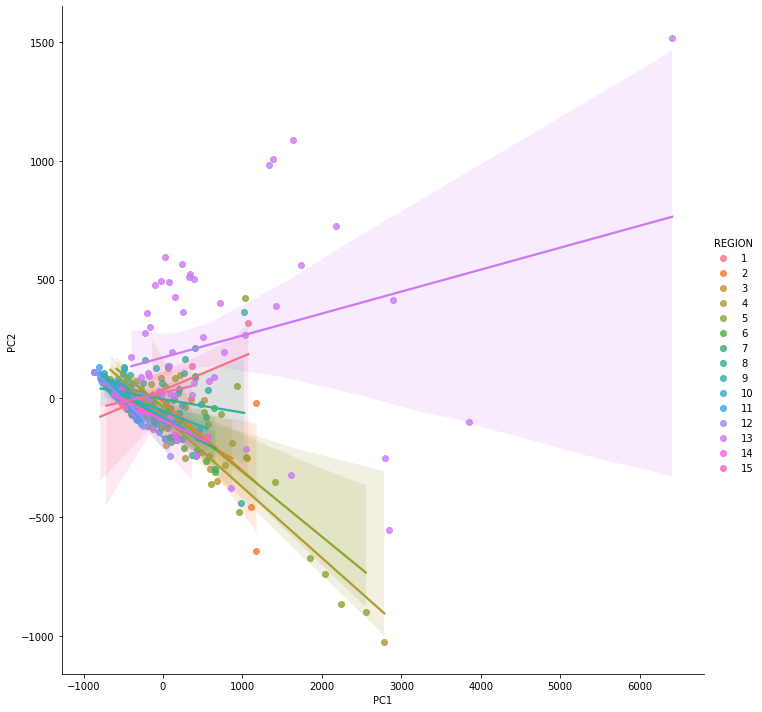

In [781]:
# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               hue='REGION',data=XX_pca,
               fit_reg=True,
               scatter=True,
               height=10)

plt.show()

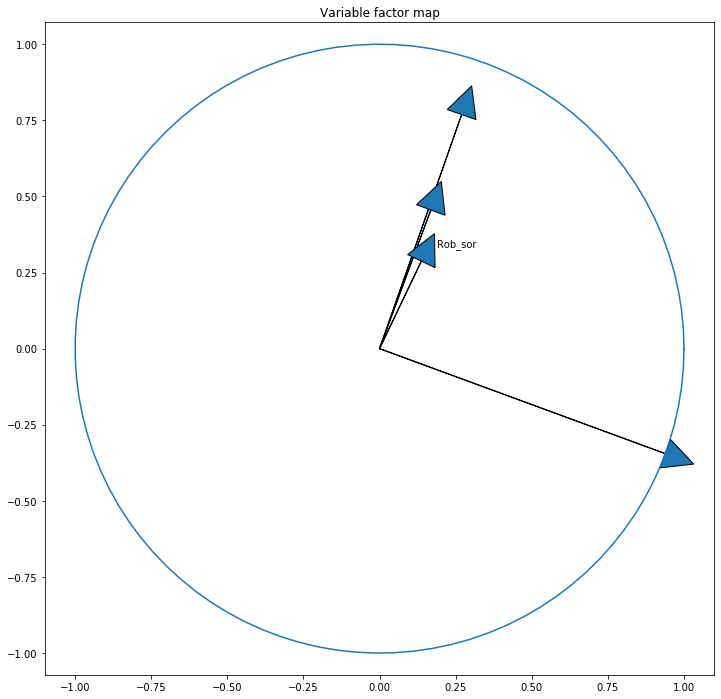

In [780]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

plt.text(pca.components_[0, i] + 0.05,
         pca.components_[1, i] + 0.05,
         df.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()